In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

data=nc.Dataset('/ihesp/xiliangdiao/ihespdata/ocn/hist/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0118-09.mix.nc')
plotvar = data.variables['HMXL'][0,:,:]
lont = data.variables['TLONG']
latt = data.variables['TLAT']
#############0117-09


In [2]:
lont = lont[:,:]
latt = latt[:,:]
plotvar = plotvar[:,:]/100

plotvar[plotvar <0] = np.nan

/scratch/user/xiliangdiao/.conda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  del sys.path[0]
/scratch/user/xiliangdiao/.conda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:24: UserWarning: The following kwargs were not used by contour: 'spacing'
findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


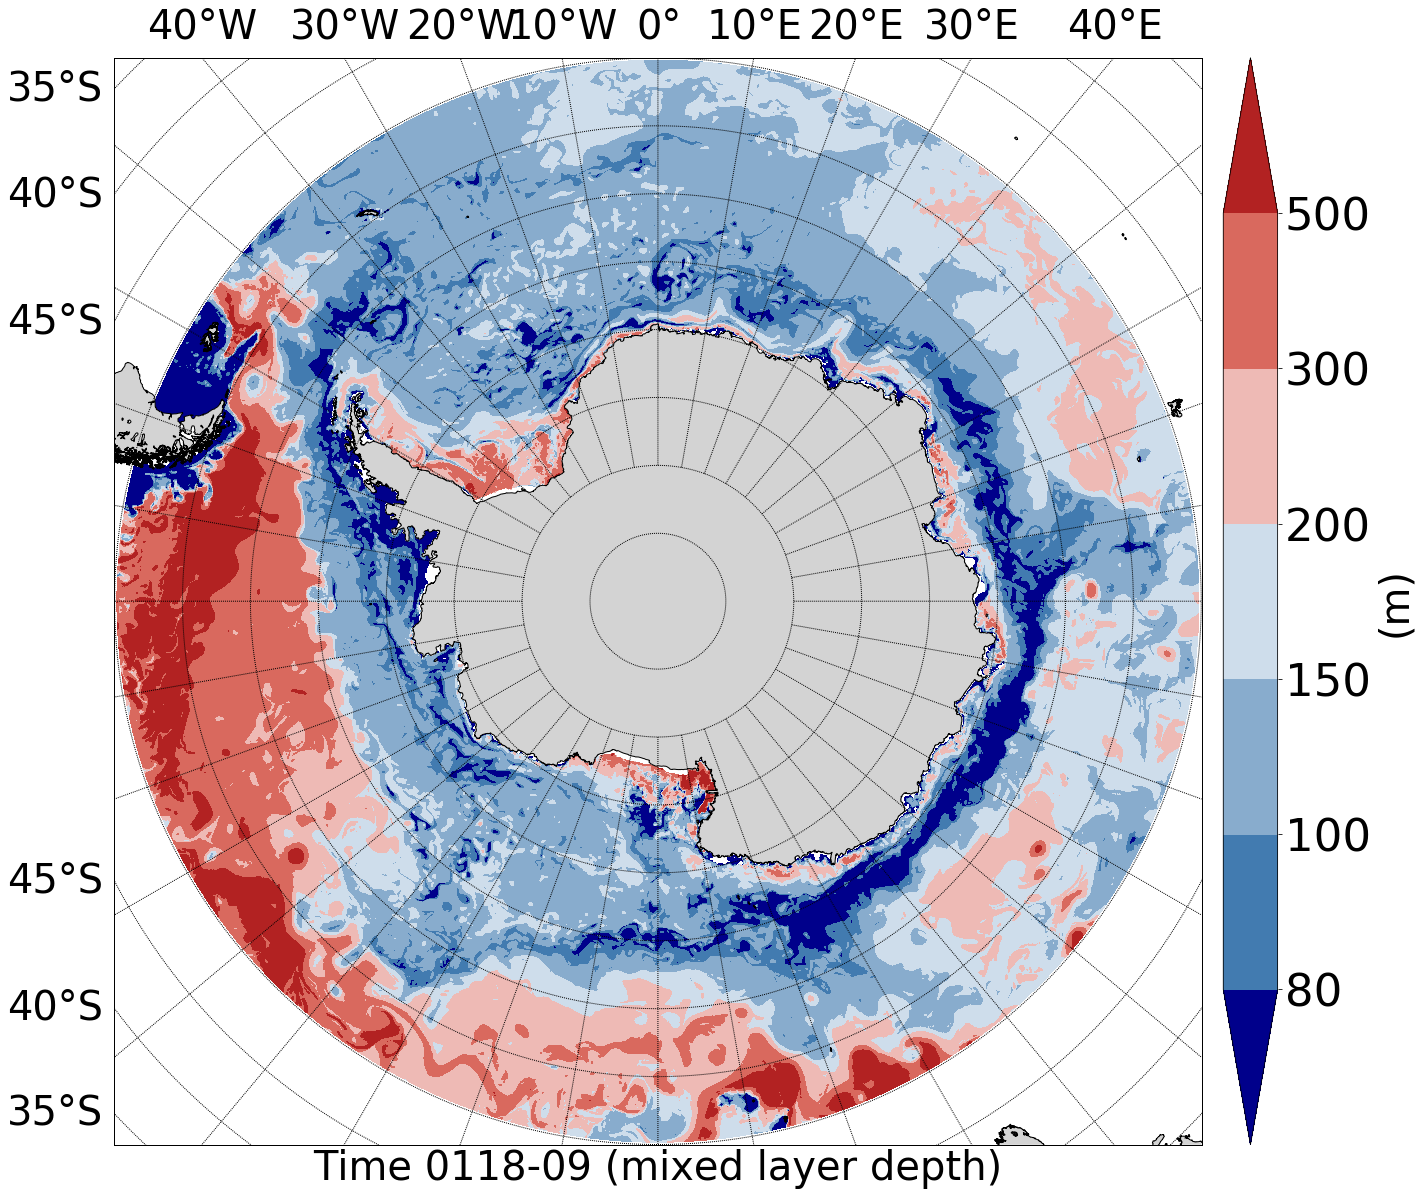

In [3]:
nice_cmap=sns.diverging_palette(245, 15, n=12,as_cmap=True)
#nice_cmap=sns.diverging_palette(245, 10, n=10,as_cmap=True)
lev_cmap = nice_cmap([0,50,100,170,210,230]) 
new_cmap = cols.ListedColormap(lev_cmap,"praj_cmap")
nice_levels = [80,100,150,200,300,500]
norm = mpl.colors.BoundaryNorm(nice_levels, new_cmap.N)
#********************************************************************

plt.figure(figsize=(25,20))
my_font = {'fontname':'Cambria', 'size':'40'}
# set the mapping range
map = Basemap(projection='aeqd', lat_0 = -90, lon_0 = 0,area_thresh = 100,\
                     width = 8900000,height = 8900000,resolution ='h') 
map.drawcoastlines()
map.fillcontinents(color = 'lightgrey')
map.drawmapboundary(color='black')
 
map.drawparallels(np.arange(-90,91,5),labels=[1,0,0,0],**my_font)
map.drawmeridians(np.arange(-180,180,10),labels=[0,0,1,0],**my_font)

x,y=map(lont,latt)
#CP = map.contourf(x,y,plotvar,cmap = new_cmap)

CP = map.contourf(x,y,plotvar,cmap = new_cmap,norm =norm,spacing = 'uniform',levels = nice_levels,extend='both')
#for c in CP.collections:
    #c.set_edgecolor("face")
#CS=map.contour(x,y,plotvar,[0.1,0.2],colors = 'b', linestyles = 'solid',linewidths=3)
#CS=map.contour(x,y,plotvar,colors = 'r', linestyles = 'solid',linewidths=1)
#plt.clabel(CS, inline=0.1, fontsize=30)
CP.cmap.set_over('firebrick')
CP.cmap.set_under('darkblue')
cbar =map.colorbar(CP,extend='both',extendfrac='auto')
#cbar =map.colorbar(CP)
cbar.ax.tick_params(labelsize=45) 
cbar.set_label('(m)', **my_font)
plt.xlabel("Time 0118-09 (mixed layer depth)",**my_font)
plt.savefig("whole118-09Hmxlnew.png")